In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple
# import ace_tools as tools

![alt text](image.png)

In [3]:
# -------------------------------------------------
# 2.  Generic 1‑D subgradient‑descent
# -------------------------------------------------
def subgradient_descent(f, x0, max_iter=100, eps=pow(10, -6), c=1.0):
    """
    f          : callable returning (value, asubgradient)
    x0         : starting point
    max_iter   : iteration budget
    eps        : stop if |g| ≤ eps
    c          : stepsize constant, α_k = c / √k
    """
    x = x0
    history = []                         # store iterates if you want to inspect
    for k in range(1, max_iter + 1):
        val, g = f(x)
        history.append((k, x, val, g))
        if abs(g) <= eps:                # 0 ∈ ∂f(x)  ⇒ x is optimal
            break
        alpha = c / math.sqrt(k)         # diminishing stepsize: α_k → 0, Σα_k = ∞
        x -= alpha * g
    return x, history



Q1.
 
$
f_1(x) = |x|
$



In [4]:
def abs_value(x: float) -> tuple[float, float]:
    """
    f(x) = |x|
    returns (function value, one valid subgradient g ∈ ∂f(x))
    """
    if   x > 0:  g =  1.0
    elif x < 0:  g = -1.0
    else:        g =  0.0          # any g∈[‑1,1] is valid; choose 0
    return abs(x), g


In [5]:
x_star, trace = subgradient_descent(abs_value, x0=5.0, max_iter=100)
print(f"approx minimizer  x* = {x_star:.6f}")
print(f"value            f(x*) = {abs_value(x_star)[0]:.6f}")

approx minimizer  x* = -0.000488
value            f(x*) = 0.000488


Q2.
 
$
f_2(x) = max\{-2x, x+3, |x-1|\}
$



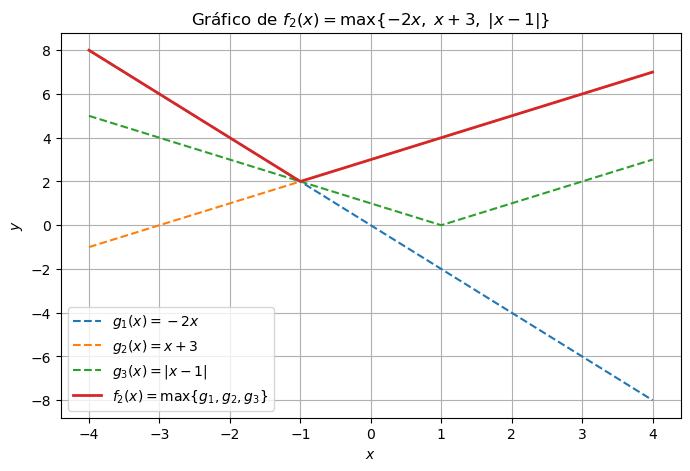

In [6]:
def g1(x):  # -2x
    return -2 * x

def g2(x):  # x + 3
    return x + 3

def g3(x):  # |x - 1|
    return np.abs(x - 1)

def f2(x):
    return np.maximum.reduce([g1(x), g2(x), g3(x)])

# Make a grid of x values
x = np.linspace(-4, 4, 1000)
y_f2 = f2(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1(x), label=r"$g_1(x)=-2x$", linestyle="--")
plt.plot(x, g2(x), label=r"$g_2(x)=x+3$", linestyle="--")
plt.plot(x, g3(x), label=r"$g_3(x)=|x-1|$", linestyle="--")
plt.plot(x, y_f2, label=r"$f_2(x)=\max\{g_1,g_2,g_3\}$", linewidth=2)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Gráfico de $f_2(x)=\max\{-2x,\;x+3,\;|x-1|\}$")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def f2(x: float) -> Tuple[float, float]:
    """
    f2(x) = max{-2x, x+3, |x-1|}
    Returns (value, one valid subgradient)
    """
    # values of each branch
    v1 = -2 * x
    v2 = x + 3
    v3 = abs(x - 1)

    max_val = max(v1, v2, v3)

    # identify active branches
    active = []
    if v1 == max_val:
        active.append(-2)              # subgradient of -2x
    if v2 == max_val:
        active.append(1)               # subgradient of  x+3
    if v3 == max_val:
        # subgradient of |x-1|
        if x < 1:
            active.append(-1)
        elif x > 1:
            active.append(1)
        else:                          # x == 1
            active.append(0)

    # choose a subgradient:
    # if 0 lies in the convex hull of active gradients, pick 0
    g_min, g_max = min(active), max(active)
    if g_min <= 0 <= g_max:
        g = 0.0
    else:
        # simple average (still inside the convex hull)
        g = sum(active) / len(active)

    return max_val, g

In [8]:
x_start = 4.0
x_star, trace = subgradient_descent(f2, x0=x_start, max_iter=50, c=1.0)

print(f"Ponto aproximado de mínimo: x* = {x_star:.6f}")
print(f"f2(x*) = {f2(x_star)[0]:.6f}")

Ponto aproximado de mínimo: x* = -1.128284
f2(x*) = 2.256568
